<img src="../support_files/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Python Bootcamp</h1> 
<h3 align="center">August 20-21, 2016, Seattle, WA</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h1>Introduction to Pandas</h1></center>

<p>
**`pandas`** is a library with high-level data structures and manipulation tools:
<p><ul> 
<li>Data loading/saving
<li>Data exploration
<li>Filtering, selecting
<li>Plotting/visualization
<li>Computing summary statistics
<li>Groupby operations
</ul>

<p>
**DataFrame Object**
<ul>
<li>Represents a tabular, spreadsheet-like data structure
<li>Ordered collection of columns
<li>Each column can be a different value type (numeric, string, boolean, etc.)
</ul>
<p>This introduction will only just scratch the surface of Pandas functionality. For more information, check out the full documentation here: 
<p>&nbsp;&nbsp;&nbsp;&nbsp;http://pandas.pydata.org/pandas-docs/stable/index.html
<p>Or check out the '10 minutes to Pandas' tutorial here: 
<p>&nbsp;&nbsp;&nbsp;&nbsp;http://pandas.pydata.org/pandas-docs/stable/10min.html
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Imports</h2>
<p>
</div>

In [68]:
# Convention for import naming
import pandas as pd

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

%matplotlib notebook

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Set a few optional pandas display settings:
</div>

In [70]:
# Format DataFrame display properties
pd.set_option('display.max_rows', 30) #maximum number of rows to display
pd.set_option('display.max_columns', 500) #maximum number of rows to display
pd.set_option('display.notebook_repr_html',True) #ensure that html display mode is enabled for best display

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Loading data</h2>
<p>Pandas has a lot of convenient built-in methods for reading data of various formats.
<p>Make and print a list of all of the Pandas methods with the word 'read' in them:
</div>

In [71]:
read_methods = [x for x in dir(pd) if 'read' in x]
for method in read_methods:
    print(method)

read_clipboard
read_csv
read_excel
read_fwf
read_gbq
read_hdf
read_html
read_json
read_msgpack
read_pickle
read_sas
read_sql
read_sql_query
read_sql_table
read_stata
read_table



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Load tabular data from CSV file</h2>

<p>A simple csv file is saved in the working directory on your hard drive. We'll take a minute to open the file and view it.
<p>Pandas can quickly load and display it. Note that it automatically parses the column names
</div>

In [73]:
sample_dataframe = pd.read_csv('support_files/SampleWorkbook.csv')
sample_dataframe

,Column 1,Column 2
0,one,1
1,two,2
2,three,3


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
We can access a particular row and column of the dataframe as follows:
</div>

In [74]:
print(sample_dataframe['Column 2'][0])

1


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Load 'Mouse Connectivity Atlas Metadata' into DataFrame using url address</h2>
<p>We know in advance that this data is saved in comma seperated value (CSV) format, so we can use the ```read_csv``` method.
</div>

In [130]:
# note the line continuations to keep the long URL from continuing outside of our cell
url_csv_file = 'http://connectivity.brain-map.org/projection/csv?'\
               'criteria=service::mouse_connectivity_injection_structure'\
               '[injection_structures$eq8,304325711][primary_structure_only$eqtrue]'
df = pd.read_csv(url_csv_file)

# The above code will download a file; if you are having trouble with the download, 
# you can try using the pre-cached file on your hard drive with the following path.
# (Call a TA to help if this doesn't work either.)
# csv_file = 'support_files/connectivity_metadata.csv'

# df = pd.read_csv(csv_file)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Use ```head()``` and ```tail()``` methods to take quick look at data structure</h2>
<p>The ```head()``` method displays the first N rows, with N=5 by default

<p>The ```tail()``` method displays the last N rows, with N=5 by default
</div>

In [76]:
df.head()

,id,name,structure-id,structure-abbrev,structure-name,structure-color,strain,transgenic-line,gender,injection-coordinates,injection-volume,injection-structures,product-id,sum,num-voxels,selected,experiment_page_url
0,180435652,378-1825,895,ECT,Ectorhinal area,0D9F91,C57BL/6J,NaN,M,"[7820, 4250, 9870]",1.022540,"[{""id""=>541, ""name""=>""Temporal association are...",5,27.23183,492962,False,http://connectivity.brain-map.org/projection/e...
1,180436360,378-1827,677,VISC,Visceral area,11AD83,C57BL/6J,NaN,M,"[4800, 4720, 8980]",1.153510,"[{""id""=>111, ""name""=>""Agranular insular area, ...",5,27.05213,486846,False,http://connectivity.brain-map.org/projection/e...
2,166055636,Rbp4-Cre-91,993,MOs,Secondary motor area,1F9D5A,unknown,Rbp4-Cre_KL100,M,"[3080, 1970, 6130]",0.486499,"[{""id""=>39, ""name""=>""Anterior cingulate area, ...",5,23.13456,491746,False,http://connectivity.brain-map.org/projection/e...
3,180719293,378-1822,985,MOp,Primary motor area,1F9D5A,C57BL/6J,NaN,M,"[3140, 3330, 7390]",1.081540,"[{""id""=>985, ""name""=>""Primary motor area"", ""ab...",5,22.57134,482361,False,http://connectivity.brain-map.org/projection/e...
4,167902586,Rbp4-Cre-129,746,ORBvl,"Orbital area, ventrolateral part",248A5E,unknown,Rbp4-Cre_KL100,F,"[2570, 3680, 5890]",0.536006,"[{""id""=>39, ""name""=>""Anterior cingulate area, ...",5,22.23606,488239,False,http://connectivity.brain-map.org/projection/e...


In [77]:
df.tail(2)

,id,name,structure-id,structure-abbrev,structure-name,structure-color,strain,transgenic-line,gender,injection-coordinates,injection-volume,injection-structures,product-id,sum,num-voxels,selected,experiment_page_url
2277,183172820,Crh-IRES-Cre-286,993,MOs,Secondary motor area,1F9D5A,B6.129,Crh-IRES-Cre (BL),M,"[5370, 1610, 6210]",0.021624,"[{""id""=>39, ""name""=>""Anterior cingulate area, ...",5,0.00211,491746,False,http://connectivity.brain-map.org/projection/e...
2278,308395312,Ntrk1-IRES-Cre-123872,672,CP,Caudoputamen,98D6F9,B6;129,Ntrk1-IRES-Cre,M,"[5410, 3490, 7360]",0.005083,"[{""id""=>672, ""name""=>""Caudoputamen"", ""abbrevia...",5,0.00181,484959,False,http://connectivity.brain-map.org/projection/e...


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Print a particular value
</div>

In [78]:
print(df['experiment_page_url'][371])

http://connectivity.brain-map.org/projection/experiment/307296433


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Many familiar functions/methods work with DataFrames</h2>
<p>
</div>

In [79]:
# numpy function
np.shape(df)

(2279, 17)

In [80]:
# python built-in function
len(df)

2279

In [81]:
# methods
print(df.keys())
print("")
print(df.columns)

Index([u'id', u'name', u'structure-id', u'structure-abbrev', u'structure-name',
       u'structure-color', u'strain', u'transgenic-line', u'gender',
       u'injection-coordinates', u'injection-volume', u'injection-structures',
       u'product-id', u'sum', u'num-voxels', u'selected',
       u'experiment_page_url'],
      dtype='object')

Index([u'id', u'name', u'structure-id', u'structure-abbrev', u'structure-name',
       u'structure-color', u'strain', u'transgenic-line', u'gender',
       u'injection-coordinates', u'injection-volume', u'injection-structures',
       u'product-id', u'sum', u'num-voxels', u'selected',
       u'experiment_page_url'],
      dtype='object')


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 6.1:**
<p>Identify another familiar function that works with the DataFrame
</div>

In [82]:
#answer
#dir, np.max, np.mean, np.unique(), type()
np.max(df)

id                                                               501484658
name                                                 Wfs1-Tg3-CreERT2-5317
structure-id                                                     312782628
structure-abbrev                                                    retina
structure-name                                                      retina
structure-color                                                     FFFDBC
strain                                                             unknown
transgenic-line                                           Wfs1-Tg3-CreERT2
gender                                                             unknown
injection-coordinates                                   [9990, 4650, 7880]
injection-volume                                                   1.54738
injection-structures     [{"id"=>993, "name"=>"Secondary motor area", "...
product-id                                                              36
sum                      

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>The dataframe object has a lot of useful built-in functions</h2>
<p>Start with ```unique```
</div>

In [83]:
print('Genders:',df['gender'].unique())

Genders: ['M' 'F' 'unknown']


In [16]:
print("transgenic lines in the dataset:")
for line in df['transgenic-line'].unique():
    print("  ",line)

transgenic lines in the dataset:
   nan
   Rbp4-Cre_KL100
   Slc6a4-Cre_ET33
   Vipr2-Cre_KE2
   Emx1-IRES-Cre
   Slc6a4-CreERT2_EZ13
   Rasgrf2-2A-dCre
   Erbb4-2A-CreERT2
   Gpr26-Cre_KO250
   Dlg3-Cre_KG118
   Slc17a6-IRES-Cre
   Fezf1-2A-dCre
   Ppp1r17-Cre_NL146
   Trib2-2A-CreERT2
   Esr1-2A-Cre
   Efr3a-Cre_NO108
   Slc6a5-Cre_KF109
   Cart-Tg1-Cre
   Cux2-IRES-Cre
   Glt25d2-Cre_NF107
   Sim1-Cre
   Gnb4-IRES2-Cre
   Cck-IRES-Cre
   Grm2-Cre_MR90
   Grik4-Cre
   Plxnd1-Cre_OG1
   Slc6a3-Cre
   Syt17-Cre_NO14
   Slc18a2-Cre_OZ14
   Prkcd-GluCla-CFP-IRES-Cre
   Ntng2-IRES2-Cre
   Cnnm2-Cre_KD18
   Ntrk1-IRES-Cre
   Adcyap1-2A-Cre
   Slc32a1-IRES-Cre
   A930038C07Rik-Tg1-Cre
   Chat-IRES-Cre
   Satb2-Cre_MO23
   Lypd6-Cre_KL156
   Tac1-IRES2-Cre
   Htr2a-Cre_KM207
   Tlx3-Cre_PL56
   Grp-Cre_KH288
   Etv1-CreERT2
   Drd1a-Cre
   Dbh-Cre_KH212
   Oxtr-Cre_ON66
   Drd3-Cre_KI198
   Pvalb-IRES-Cre
   Syt6-Cre_KI148
   Calb2-IRES-Cre
   Pomc-Cre (BL)
   Drd3-Cre_KI196
   Jam2-Cre
   C

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.2:**
<ol>
<li> How many different transgenic lines were used in this dataset?
<li> How many different brain structures were injected in this dataset?
</ol>
</div>

In [84]:
#answer

print("number of transgenic lines:",len(df['transgenic-line'].unique()))
print("number of unique brain structures:",len(df['structure-abbrev'].unique()))

number of transgenic lines: 116
number of unique brain structures: 205


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Selecting columns</h2>

<p>Retrieve column based on column name.
<p>There are two notations that allow you to access data from a column:
<ul>
<li>bracket notation
<li>dot notation
</ul>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Bracket notation:

</div>

In [85]:
inj_vol = df['injection-volume']
inj_vol.head()

0    1.022540
1    1.153510
2    0.486499
3    1.081540
4    0.536006
Name: injection-volume, dtype: float64

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Dot notation:
<p>note that this is sensitive to special characters in the variable name such as spaces, dashes, etc.

</div>

In [86]:
strain = df.strain
print(strain.head())

0    C57BL/6J
1    C57BL/6J
2     unknown
3    C57BL/6J
4     unknown
Name: strain, dtype: object


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
The returned column is a Series object
</div>

In [87]:
print(type(strain))

<class 'pandas.core.series.Series'>


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 6.3:**
<ol>
<li>What data type are entries in the column "injection-volume"?
<li>What data type are entries in the column "injection-coordinates"?
</ol>
</div>

In [88]:
#answer
print(type(df['injection-coordinates'][0]))
print(type(df['injection-volume'][0]))

<type 'str'>
<type 'numpy.float64'>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Get values as numpy ndarray</h2>
<p>
</div>


In [89]:
values_inj_vol = df['injection-volume'].values
values_inj_vol

array([ 1.02254 ,  1.15351 ,  0.486499, ...,  0.010238,  0.021624,
        0.005083])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Print the type of ```values_inj_volume```:
</div>

In [90]:
print(type(values_inj_vol))

<type 'numpy.ndarray'>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Plot the injection volume values using Matplotlib</h2>
<p>We can use Matplotlib to plot the array that we just extracted from the dataframe:
</div>

<IPython.core.display.Javascript object>


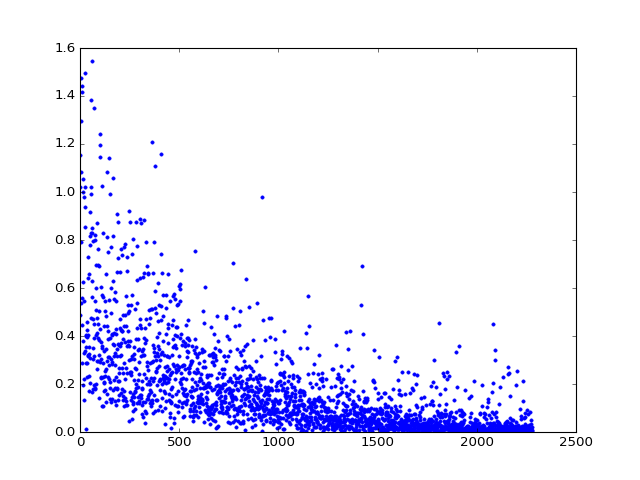

In [91]:
# Plot array to inspect array
fig,ax = plt.subplots(1,1)
ax.plot(values_inj_vol,'.')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Plot the injection volume values using the Pandas built-in plotting method</h2>
<p>Pandas also has a built-in plotting function that will allow us to make the plot directly from the dataframe
<p>It does some nice formatting for you, but you still have access to matplotlib methods
</div>

<IPython.core.display.Javascript object>


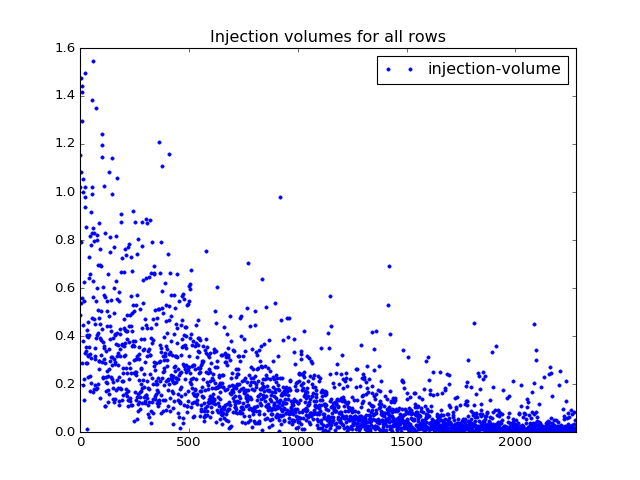

In [92]:
ax = df.plot(x=df.index,y='injection-volume',marker='.',linestyle='none')

ax.set_title('Injection volumes for all rows')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.4:**
<p>Retrieve a different column and make plot of data
</div>

<IPython.core.display.Javascript object>


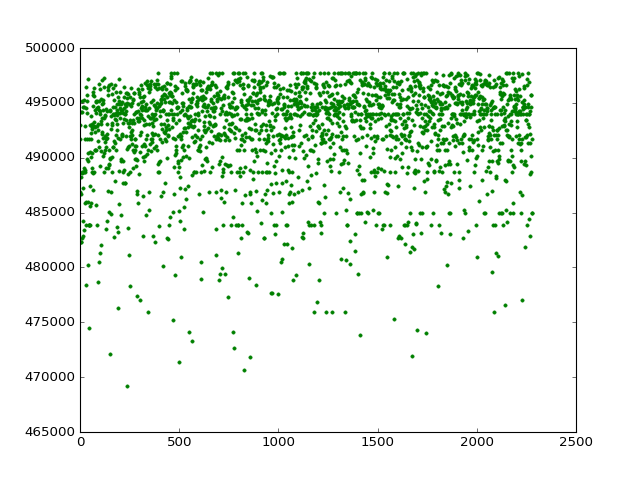

In [93]:
#answer
num_voxels = df['num-voxels'] 
fig,ax = plt.subplots()
ax.plot(num_voxels,'.g')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Select multiple columns</h2>
<p>We can make a new dataframe that contains only a subset of the column data from the first dataframe
</div>

In [94]:
# Use copy to get new DataFrame object instead of a 'view' on existing object
df2 = df[['transgenic-line','injection-volume']].copy()

In [95]:
df2.head(10)

,transgenic-line,injection-volume
0,NaN,1.022540
1,NaN,1.153510
2,Rbp4-Cre_KL100,0.486499
3,NaN,1.081540
4,Rbp4-Cre_KL100,0.536006
5,NaN,0.793079
6,NaN,1.474210
7,NaN,1.295040
8,Slc6a4-Cre_ET33,0.289425
9,NaN,1.416060


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Adding, deleting columns</h2>
<p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Let's add a column denoting whether injection is in wild type or transgenic mouse.
<p>Note that wild type mice have a ```NaN``` in the 'transgenic-line' column
</div>

In [96]:
df2['transgenic-line'].head()

0               NaN
1               NaN
2    Rbp4-Cre_KL100
3               NaN
4    Rbp4-Cre_KL100
Name: transgenic-line, dtype: object

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Step 1:
<p>We can use the ```isnull``` method to find all of the entries with ```NaN``` or ```None```
</div>

In [97]:
is_wt = df2['transgenic-line'].isnull() #isnull() returns True if value is NaN or None. 
print(is_wt.head())

0     True
1     True
2    False
3     True
4    False
Name: transgenic-line, dtype: bool


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Step 2:
<p>We can create a new column and assign the 'is_wt' series that we just created to that column
</div>

In [98]:
df2['is_wildtype'] = is_wt

In [99]:
df2.head(5)

,transgenic-line,injection-volume,is_wildtype
0,NaN,1.022540,True
1,NaN,1.153510,True
2,Rbp4-Cre_KL100,0.486499,False
3,NaN,1.081540,True
4,Rbp4-Cre_KL100,0.536006,False


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Delete column (note: inplace argument)</h2>
<p>
</div>

In [100]:
df2.drop('transgenic-line',axis=1,inplace=True)
# note: this would the same as df2 = df2.drop('transgenic-line',axis=1)

In [101]:
df2.head(6)

,injection-volume,is_wildtype
0,1.022540,True
1,1.153510,True
2,0.486499,False
3,1.081540,True
4,0.536006,False
5,0.793079,True


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Selecting rows and filtering</h2>
<p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**Slice rows**
<p>We can use Numpy-like slicing to access particular rows
</div>

In [102]:
df[150:190:10] # [start:end:step]

,id,name,structure-id,structure-abbrev,structure-name,structure-color,strain,transgenic-line,gender,injection-coordinates,injection-volume,injection-structures,product-id,sum,num-voxels,selected,experiment_page_url
150,115958825,378-1185,1011,AUDd,Dorsal auditory area,019399,C57BL/6J,NaN,M,"[8100, 2190, 9290]",0.210049,"[{""id""=>402, ""name""=>""Anterolateral visual are...",5,6.56614,494285,False,http://connectivity.brain-map.org/projection/e...
160,127907465,378-1318,961,PIR,Piriform area,6ACBBA,C57BL/6J,NaN,M,"[4360, 6100, 8110]",0.289846,"[{""id""=>583, ""name""=>""Claustrum"", ""abbreviatio...",5,6.48834,490097,False,http://connectivity.brain-map.org/projection/e...
170,125832322,378-1267,319,BMA,Basomedial amygdalar nucleus,84EA81,C57BL/6J,NaN,M,"[7600, 6100, 8190]",0.315599,"[{""id""=>295, ""name""=>""Basolateral amygdalar nu...",5,6.22996,493953,False,http://connectivity.brain-map.org/projection/e...
180,484504171,Slc17a6-IRES-Cre-197396,362,MD,Mediodorsal nucleus of thalamus,FF909F,NaN,Slc17a6-IRES-Cre,F,"[6260, 4200, 5040]",0.227181,"[{""id""=>15, ""name""=>""Parataenial nucleus"", ""ab...",36,5.97977,496009,False,http://connectivity.brain-map.org/projection/e...


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**Selection purely by position (integer index)**
<p>We can also access columns by their numerical indices
</div>

In [103]:
df.iloc[150:190:10,0:10:2]  # [row start:end:step, column start:end:step]

,id,structure-id,structure-name,strain,gender
150,115958825,1011,Dorsal auditory area,C57BL/6J,M
160,127907465,961,Piriform area,C57BL/6J,M
170,125832322,319,Basomedial amygdalar nucleus,C57BL/6J,M
180,484504171,362,Mediodorsal nucleus of thalamus,NaN,F


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**Select rows based on boolean array (very commonly used)**
<p>This is very powerful as it lets you slice the dataframe using logical conditions
<p>Let's keep working with our new ```df2``` for now
</div>

In [104]:
df2.head()

,injection-volume,is_wildtype
0,1.022540,True
1,1.153510,True
2,0.486499,False
3,1.081540,True
4,0.536006,False


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>We can create a boolean array based on our 'is_wildtype' column
</div>

In [105]:
boolean_array = df2.is_wildtype.values
print(boolean_array)

[ True  True False ..., False False False]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>And if we apply that boolean array to the entire dataframe, we'll be left with only rows where the boolean array was ```True```
</div>

In [106]:
df2[boolean_array].head(15)

,injection-volume,is_wildtype
0,1.022540,True
1,1.153510,True
3,1.081540,True
5,0.793079,True
6,1.474210,True
7,1.295040,True
9,1.416060,True
10,0.558847,True
11,1.443090,True
13,0.195324,True


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**Expression in brackets that yields boolean array**
<p>This can be done in one line by putting an expression into the brackets that will yield a boolean array
</div>

In [107]:
df2[df2.is_wildtype==False].head(5)

,injection-volume,is_wildtype
2,0.486499,False
4,0.536006,False
8,0.289425,False
12,0.447624,False
15,0.379654,False


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>We can combine multiple logical statements using the ```&``` or ```|``` characters
<p>For instance, let's find all of the male Sst-Cre and Vip-IRES-Cre mice in our full dataframe:
</div>

In [108]:
df[((df['transgenic-line']=='Sst-Cre') | (df['transgenic-line']=='Vip-IRES-Cre')) & (df['gender']=='M')]

,id,name,structure-id,structure-abbrev,structure-name,structure-color,strain,transgenic-line,gender,injection-coordinates,injection-volume,injection-structures,product-id,sum,num-voxels,selected,experiment_page_url
1574,262188772,Vip-IRES-Cre-210,795,PAG,Periaqueductal gray,FF90FF,unknown,Vip-IRES-Cre,M,"[9570, 3150, 5680]",0.024755,"[{""id""=>294, ""name""=>""Superior colliculus, mot...",5,0.24717,492000,False,http://connectivity.brain-map.org/projection/e...
1712,160294327,Sst-Cre-D-806,250,LSc,"Lateral septal nucleus, caudal (caudodorsal) part",90CBED,B6.Cg,Sst-Cre,M,"[4810, 3350, 5890]",0.064130,"[{""id""=>250, ""name""=>""Lateral septal nucleus, ...",5,0.17475,496310,False,http://connectivity.brain-map.org/projection/e...
1928,182935487,Vip-IRES-Cre-206,993,MOs,Secondary motor area,1F9D5A,unknown,Vip-IRES-Cre,M,"[5090, 1560, 6370]",0.014262,"[{""id""=>39, ""name""=>""Anterior cingulate area, ...",5,0.10601,482722,False,http://connectivity.brain-map.org/projection/e...
2113,299897573,Vip-IRES-Cre-129391,961,PIR,Piriform area,6ACBBA,B6.Cg,Vip-IRES-Cre,M,"[6280, 6350, 9470]",0.021946,"[{""id""=>952, ""name""=>""Endopiriform nucleus, do...",5,0.05293,490113,False,http://connectivity.brain-map.org/projection/e...
2252,182293273,Vip-IRES-Cre-192,385,VISp,Primary visual area,08858C,unknown,Vip-IRES-Cre,M,"[9940, 1370, 8360]",0.024980,"[{""id""=>385, ""name""=>""Primary visual area"", ""a...",5,0.01579,493989,False,http://connectivity.brain-map.org/projection/e...


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.5:**
<ol>
<li>Generate a new dataframe with only injections into primary visual cortex (hint: the abbreviation for primary visual cortex is VISp)
<li>How many injections were made into V1?
<ol>
</div>

In [109]:
#answer
dfv1 = df[df['structure-abbrev']=='VISp']# structure-abbrev for primary visual cortex is VISp
print("there were",len(dfv1),"injections into V1")

there were 142 injections into V1


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>More useful methods</h2>
<p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**isin()**
<p> Use ```isin()``` to find all injections into either 'AUDp' (primary auditory cortex) or 'SSp-bfd' (the barrel field of the primary somatosensory cortex)
</div>

In [110]:
area_list = ['AUDp','SSp-bfd']
df_areas = df[df['structure-abbrev'].isin(area_list)] #This is an alternative to using OR

print('There were',len(df_areas),'injections into these structures')

There were 72 injections into these structures


In [111]:
df_areas.head(6)

,id,name,structure-id,structure-abbrev,structure-name,structure-color,strain,transgenic-line,gender,injection-coordinates,injection-volume,injection-structures,product-id,sum,num-voxels,selected,experiment_page_url
41,112951804,378-1091,329,SSp-bfd,"Primary somatosensory area, barrel field",188064,C57BL/6J,NaN,M,"[6890, 2260, 8670]",0.403435,"[{""id""=>329, ""name""=>""Primary somatosensory ar...",5,11.57163,489681,False,http://connectivity.brain-map.org/projection/e...
109,126907302,378-1352,329,SSp-bfd,"Primary somatosensory area, barrel field",188064,C57BL/6J,NaN,M,"[7210, 1280, 8030]",0.571241,"[{""id""=>329, ""name""=>""Primary somatosensory ar...",5,7.59321,492379,False,http://connectivity.brain-map.org/projection/e...
128,100142655,378-850,329,SSp-bfd,"Primary somatosensory area, barrel field",188064,C57BL/6J,NaN,M,"[6750, 1490, 7940]",0.175829,"[{""id""=>329, ""name""=>""Primary somatosensory ar...",5,7.17619,493775,False,http://connectivity.brain-map.org/projection/e...
164,127866392,378-1488,329,SSp-bfd,"Primary somatosensory area, barrel field",188064,C57BL/6J,NaN,M,"[7070, 2150, 8900]",0.175441,"[{""id""=>329, ""name""=>""Primary somatosensory ar...",5,6.40754,494593,False,http://connectivity.brain-map.org/projection/e...
230,266172624,Trib2-2A-CreERT2-D-3235,329,SSp-bfd,"Primary somatosensory area, barrel field",188064,B6.129,Trib2-2A-CreERT2,M,"[6010, 2280, 8250]",0.268665,"[{""id""=>329, ""name""=>""Primary somatosensory ar...",5,5.17663,491952,False,http://connectivity.brain-map.org/projection/e...
313,146858006,378-1506,1002,AUDp,Primary auditory area,019399,C57BL/6J,NaN,M,"[8200, 2540, 9580]",0.114172,"[{""id""=>1002, ""name""=>""Primary auditory area"",...",5,4.04470,494636,False,http://connectivity.brain-map.org/projection/e...


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**value_counts()**
<p>This method returns an object containing counts of unique values, in descending order.
</div>

In [112]:
# Top 20 Cre lines used in connectivity atlas
df['transgenic-line'].value_counts()[:20]

Rbp4-Cre_KL100           84
Cux2-IRES-Cre            75
Gad2-IRES-Cre            64
A930038C07Rik-Tg1-Cre    63
Slc17a6-IRES-Cre         56
Syt6-Cre_KI148           55
Ntsr1-Cre_GN220          47
Scnn1a-Tg3-Cre           47
Chrna2-Cre_OE25          42
Efr3a-Cre_NO108          41
Ppp1r17-Cre_NL146        40
Calb2-IRES-Cre           33
Gal-Cre_KI87             32
Slc18a2-Cre_OZ14         32
Htr2a-Cre_KM207          31
Gpr26-Cre_KO250          30
Chat-IRES-Cre            29
Tlx3-Cre_PL56            28
Grik4-Cre                28
Pvalb-IRES-Cre           28
Name: transgenic-line, dtype: int64

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Summary statistics</h2>
<p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Get summary statistics of a particular column
</div>

In [113]:
df['injection-volume'].describe()

count    2279.000000
mean        0.167608
std         0.204868
min         0.000045
25%         0.030883
50%         0.097480
75%         0.223118
max         1.547380
Name: injection-volume, dtype: float64

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Bar plot</h2>
<p>Use the built-in bar plot method
</div>

<IPython.core.display.Javascript object>


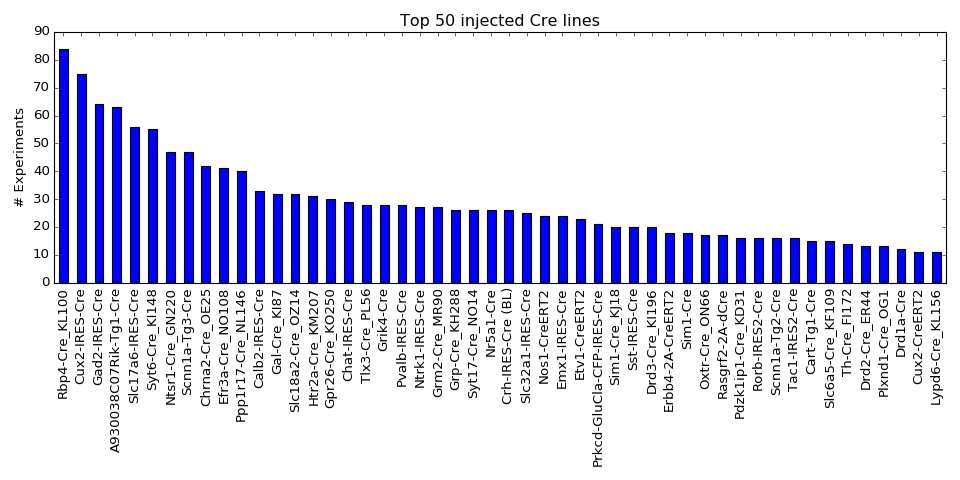

In [114]:
fig,ax=plt.subplots(figsize=(12,6))
df['transgenic-line'].value_counts()[:50].plot(kind='bar')
ax.set_title("Top 50 injected Cre lines");
ax.set_ylabel("# Experiments");
fig.tight_layout() #this keeps the x-labels from getting cut off

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.6:**
<p>Make a bar plot of the top 20 most injected brain areas in the connectivity atlas.
</div>

<IPython.core.display.Javascript object>


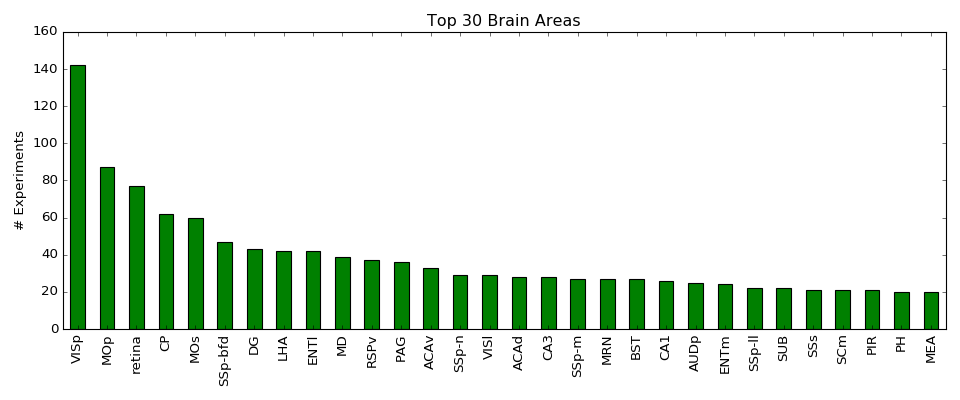

In [115]:
#answer
fig,ax=plt.subplots(figsize=(12,5))
df['structure-abbrev'].value_counts()[:30].plot(kind='bar',color='green')
ax.set_title("Top 30 Brain Areas");
ax.set_ylabel("# Experiments");
fig.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Groupby operations</h2>
<p>We're going to group by two characteristics: the injection structure and the gender, the find the minimum injection volume in each group
</div>

In [116]:
grouped = df.groupby(['structure-abbrev','gender']).min()

columns_to_display = ['injection-volume','num-voxels']

grouped[columns_to_display].head(20)

injection-volume  num-voxels
structure-abbrev gender                              
AAA              M               0.482909      490972
ACAd             F               0.004769      489959
                 M               0.001886      489959
ACAv             F               0.003996      489873
                 M               0.007222      481690
ACB              F               0.004734      479046
                 M               0.005277      474071
AD               F               0.019509      489740
                 M               0.003099      496483
AHN              F               0.055037      494382
                 M               0.112834      492815
AId              F               0.007193      484796
                 M               0.016526      474494
AIp              F               0.239347      485545
                 M               0.000772      476594
AIv              M               0.211693      475245
AM               F               0.095951      496367
                 M               0.035464      493977
AN               F               0.018869      487247
                 M               0.023365      489197

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.7:**
<p>Use groupby to compute mean injection volume in male vs female mice.
</div>

In [117]:
#answer
df.groupby('gender')['injection-volume'].mean()

gender
F          0.131337
M          0.190393
unknown    0.063898
Name: injection-volume, dtype: float64

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Making a DataFrame from scratch</h2>
<p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**From an array**
</div>

In [118]:
data = np.random.rand(100,3)
columns = ['cell_1','cell_2','cell_3']
df_arr = pd.DataFrame(data,columns=columns)
df_arr.head()

,cell_1,cell_2,cell_3
0,0.930254,0.033663,0.944381
1,0.774455,0.953126,0.505468
2,0.051195,0.122761,0.532599
3,0.779396,0.206564,0.560860
4,0.840801,0.045867,0.377701


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**From a dictionary**
</div>

In [119]:
data1 = [1.,3.2,39.]
data2 = ['Steve','Joe','Bob']

dict_data = {
    'col1_name': data1,
    'col2_name': data2}

df_from_dict = pd.DataFrame(dict_data)
df_from_dict

,col1_name,col2_name
0,1.0,Steve
1,3.2,Joe
2,39.0,Bob


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Saving (to_pickle(), to_excel())</h2>
<p>
</div>

In [120]:
save_methods = [x for x in dir(df) if 'to_' in x]
print("save_methods:")
for method in save_methods:
    print(method)

save_methods:
to_clipboard
to_csv
to_dense
to_dict
to_excel
to_gbq
to_hdf
to_html
to_json
to_latex
to_msgpack
to_panel
to_period
to_pickle
to_records
to_sparse
to_sql
to_stata
to_string
to_timestamp
to_wide


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Save to Excel
</div>

In [122]:
df_arr.to_excel('random_df.xls')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Save to a pickle file
</div>

In [123]:
df_arr.to_pickle('random_df.pkl')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.8:** 
<p>Is there a relationship between injection volume and use of Cre vs wild type mouse?
</div>

In [124]:
# Injection volume is larger in Cre line vs wild type mice
df2.groupby('is_wildtype').mean()

,injection-volume
is_wildtype,
False,0.132948
True,0.294812


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.9:** 
<p>Use documentation or online help to figure how to sort a dataframe by values in particular column.
</div>

In [125]:
df.sort_values('injection-volume',ascending=True).head(10)

,id,name,structure-id,structure-abbrev,structure-name,structure-color,strain,transgenic-line,gender,injection-coordinates,injection-volume,injection-structures,product-id,sum,num-voxels,selected,experiment_page_url
1719,397336241,FoxP2-neo-160592,304325711,retina,retina,7F2E7E,NaN,Foxp2-IRES-Cre,F,"[5830, 6960, 6410]",0.000045,"[{""id""=>304325711, ""name""=>""retina"", ""abbrevia...",31,0.17294,497686,False,http://connectivity.brain-map.org/projection/e...
1581,311547676,FOXP2-Cre-neo-160593,304325711,retina,retina,7F2E7E,NaN,Foxp2-IRES-Cre,F,"[5130, 7160, 6170]",0.000064,"[{""id""=>304325711, ""name""=>""retina"", ""abbrevia...",31,0.24093,497686,False,http://connectivity.brain-map.org/projection/e...
2152,471128008,Crh-IRES-Cre-168624,304325711,retina,retina,7F2E7E,NaN,Crh-IRES-Cre (BL),M,"[5250, 7060, 5720]",0.000135,"[{""id""=>304325711, ""name""=>""retina"", ""abbrevia...",31,0.04323,497686,False,http://connectivity.brain-map.org/projection/e...
2258,313397385,JAM2-CreER-165402,304325711,retina,retina,7F2E7E,NaN,Jam2-CreER,M,"[5910, 7030, 6050]",0.000136,"[{""id""=>304325711, ""name""=>""retina"", ""abbrevia...",31,0.01386,497686,False,http://connectivity.brain-map.org/projection/e...
1534,307162398,Cdh4-Cre-218,304325711,retina,retina,7F2E7E,NaN,Cdh4-CreER,F,"[5600, 7080, 6260]",0.000567,"[{""id""=>304325711, ""name""=>""retina"", ""abbrevia...",31,0.27428,497686,False,http://connectivity.brain-map.org/projection/e...
2056,168095756,Syt6-Cre-2815,111,AIp,"Agranular insular area, posterior part",219866,B6.Cg,Syt6-Cre_KI148,M,"[5780, 4920, 9560]",0.000772,"[{""id""=>111, ""name""=>""Agranular insular area, ...",5,0.06800,496591,False,http://connectivity.brain-map.org/projection/e...
2044,293365328,Plxnd1-Cre-121490,362,MD,Mediodorsal nucleus of thalamus,FF909F,unknown,Plxnd1-Cre_OG1,M,"[6690, 3850, 5820]",0.000878,"[{""id""=>59, ""name""=>""Intermediodorsal nucleus ...",5,0.07111,496741,False,http://connectivity.brain-map.org/projection/e...
2212,302050617,Gad2-IRES-Cre_LURC-130690,839,DMX,Dorsal motor nucleus of the vagus nerve,FFB3D9,B6.Cg,Gad2-IRES-Cre,F,"[12760, 5350, 6090]",0.000998,"[{""id""=>651, ""name""=>""Nucleus of the solitary ...",5,0.02572,497408,False,http://connectivity.brain-map.org/projection/e...
2246,495875751,Ntsr1-Cre_GN220-204693,409,VISl,Lateral visual area,08858C,NaN,Ntsr1-Cre_GN220,M,"[8870, 2030, 2460]",0.001077,"[{""id""=>385, ""name""=>""Primary visual area"", ""a...",35,0.01738,493401,False,http://connectivity.brain-map.org/projection/e...
1952,158142090,Pomc-Cre (ST)-1267,223,ARH,Arcuate hypothalamic nucleus,FF5D50,B6.FVB,Pomc-Cre (ST),F,"[7250, 6980, 5760]",0.001232,"[{""id""=>223, ""name""=>""Arcuate hypothalamic nuc...",5,0.09876,497568,False,http://connectivity.brain-map.org/projection/e...


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.10:** 
<p>Use injection coordinates to plot spatial distribution of injections.

<p>Make a 2D plot in which the following is true:
<ol>
<li>Each injection is a dot
<li>The injection locations are collapsed on two of the three dimensions (choose which two, maybe try it multiple ways)
<li>The dot size represents the injection volume
<li>The dot color represents the cre-line
</ol>
<p>**The final plot should look like one projection of the rotatable plot at:** http://connectivity.brain-map.org/
</div>

In [126]:
#hint 1: injection coordinates are strings, they need to be turned into a list of integers. Use the 'eval' command

#Get the injection coordinates as a numpy array
coords = df['injection-coordinates'].values

#Use a list comprehension to run eval on each entry in the array
coords = [eval(x) for x in coords]

In [127]:
#hint 2: the plotting will be easier if you first make a separate column for each of the three coordinate dimensions

#Create a new column that contains the injection coordinates as lists of integers
df['injection-coordinates_int'] = coords

#Create three new columns, each of which contains one of the the three entries in the injection coordinates list
df['injection-coordinates0'] = np.array(coords)[:,0]
df['injection-coordinates1'] = np.array(coords)[:,1]
df['injection-coordinates2'] = np.array(coords)[:,2]

In [128]:
#hint3: There's already a column called 'structure-color' which has hexidecimal color codes.
#       However, they need to be preceded by a '#' sign to be interpretable by matplotlib.

#Get the colors column as a numpy array
colors = df['structure-color'].values

#Use a list comprehension to append a '#' to every string in the array, then set the column equal to the new array
df['structure-color'] = ['#'+x for x in colors]

<IPython.core.display.Javascript object>


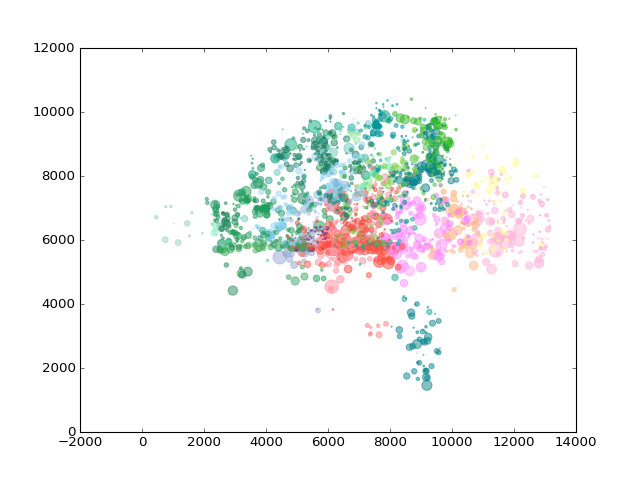

In [129]:
#hint 4: Use the matplotlib scatter method
#hint 5: the 0 vs. 2 injection coordinate elements will provide a dorsal view
#hint 6: If the dots look too small, scale them by an arbitrary scaling factor

#Create a figure and axis
fig,ax=plt.subplots()

#Make a scater plot with data from two dimensions
ax.scatter(df['injection-coordinates0'],
           df['injection-coordinates2'],
           s=100*df['injection-volume'],
           color=df['structure-color'],
           alpha=0.5)


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.11:
<p>** Find a dataset online and explore with a DataFrame ... 
</div>
